In [12]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\loren\anaconda3\lib\site-packages (0.21.2)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataset = pd.read_csv('C:/Users/loren/Desktop/LSBU/MachineLearning/LabPython/shopping.csv')

In [3]:
dataset

In [4]:
x = dataset.iloc[:, [2, 3,4]].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


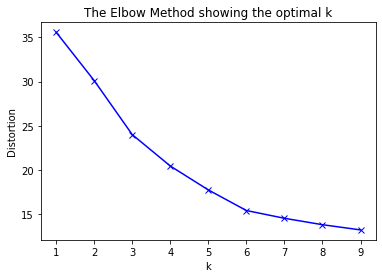

In [6]:
# clustering dataset
# determine k using elbow method

from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

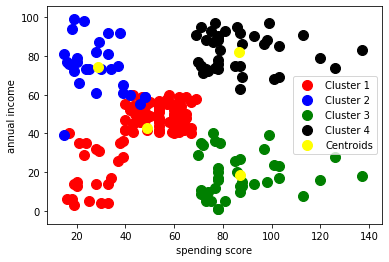

In [10]:
plt.scatter(x[y_kmeans == 0,1], x[y_kmeans == 0,2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,1], x[y_kmeans == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,1], x[y_kmeans == 2,2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,1], x[y_kmeans == 3,2], s = 100, c = 'black', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('spending score')
plt.ylabel('annual income')
plt.legend()

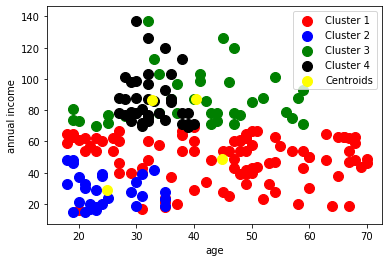

In [11]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 100, c = 'black', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('age')
plt.ylabel('annual income')
plt.legend()  

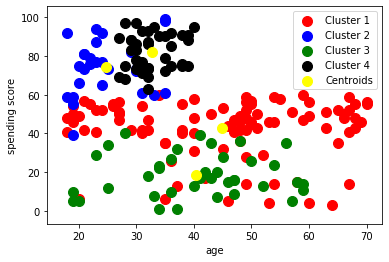

In [12]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,2], s = 100, c = 'black', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('age')
plt.ylabel('spending score')
plt.legend()


In [ ]:
sns.pairplot(dataset.drop("CustomerID", axis=1), hue= 'Genre' , size=3)